# Primera tarea - Modelamiento matemático II

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


In [3]:
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),
delimiter='¬')

<ipython-input-3-b47bfbcd8da1>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),


## Eliminación de valores faltantes

Para ello puede implementar los algoritmos sobre el elemento icfes_sin_nan generado por la siguiente línea de código:

In [4]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &
(~datos_icfes['PUNT_C_NATURALES'].isna()) &
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
(~datos_icfes['PUNT_INGLES'].isna())]



## Selección de variables explicativas a partir de los diagramas de dispersión

entre
la variable respuesta y una a una de las variables explicativas

In [5]:
icfes_sin_nan.columns

tabla_de_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]


tabla_de_regresion.head(7)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0
8,51.019087,60,70,69,63,73.0


<Axes: >

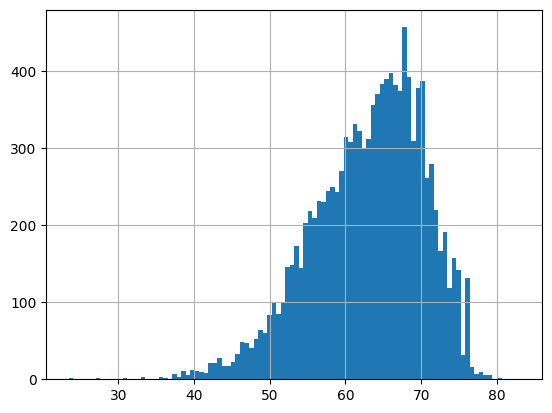

In [ ]:
tabla_de_regresion['ESTU_INSE_INDIVIDUAL'].hist(bins=100)


<Axes: >

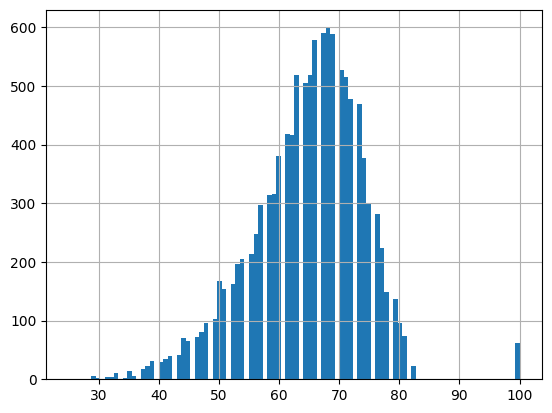

In [ ]:
tabla_de_regresion['PUNT_LECTURA_CRITICA'].hist(bins=100)


<Axes: >

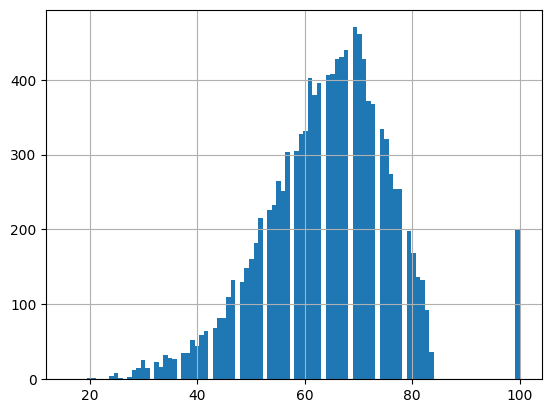

In [ ]:
tabla_de_regresion['PUNT_MATEMATICAS'].hist(bins=100)


<Axes: >

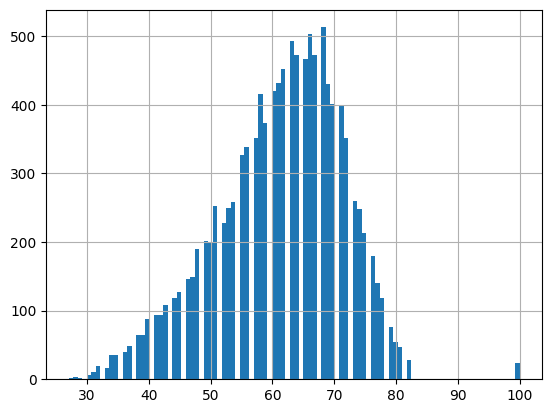

In [ ]:
tabla_de_regresion['PUNT_C_NATURALES'].hist(bins=100)


<Axes: >

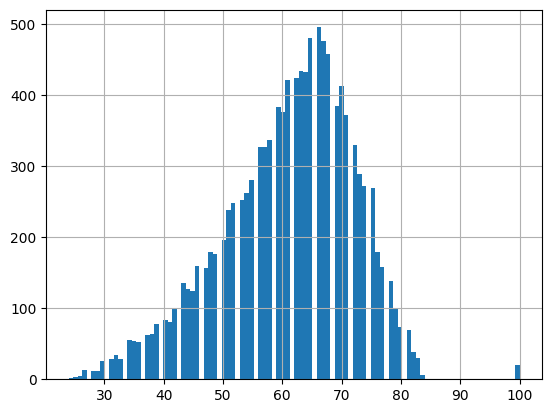

In [ ]:
tabla_de_regresion['PUNT_SOCIALES_CIUDADANAS'].hist(bins=100)


<Axes: >

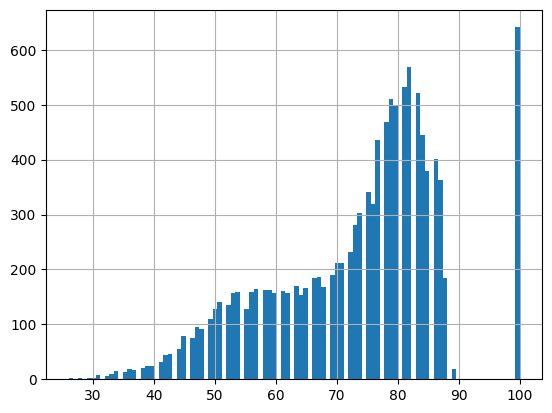

In [ ]:
tabla_de_regresion['PUNT_INGLES'].hist(bins=100)

In [6]:
from sklearn.model_selection import train_test_split
x = np.array(tabla_de_regresion['ESTU_INSE_INDIVIDUAL']).reshape(-1,1)
y = tabla_de_regresion['PUNT_MATEMATICAS']
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)

In [7]:
x0 = np.array(tabla_de_regresion['ESTU_INSE_INDIVIDUAL']).reshape(-1,1)
y0 = tabla_de_regresion['PUNT_MATEMATICAS']
modelo_lineal01 = LinearRegression()
regresion01 = modelo_lineal01.fit(x0, y0)
pred_lineal01 = regresion01.predict(x0)

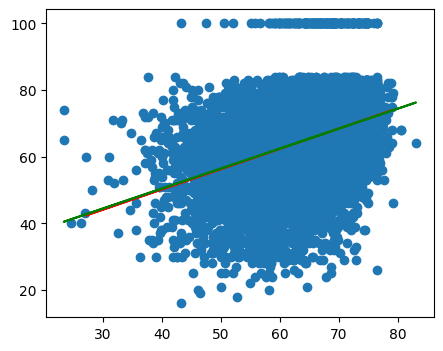

In [8]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], tabla_de_regresion['PUNT_MATEMATICAS'])
plt.plot(testx, pred_lineal, linestyle='-', color = "red")
plt.plot(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], pred_lineal01, linestyle='-', color = "green")
plt.show()

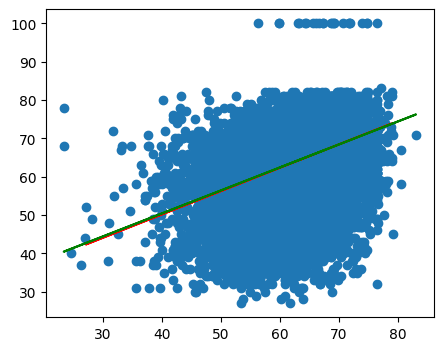

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], tabla_de_regresion['PUNT_C_NATURALES'])
plt.plot(testx, pred_lineal, linestyle='-', color = "red")
plt.plot(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], pred_lineal01, linestyle='-', color = "green")
plt.show()

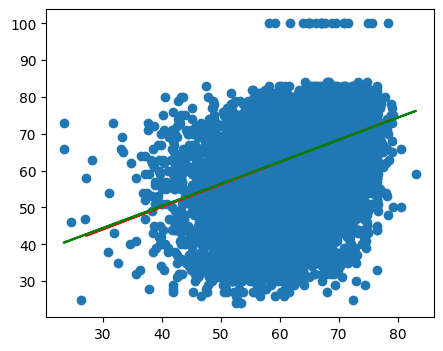

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], tabla_de_regresion['PUNT_SOCIALES_CIUDADANAS'])
plt.plot(testx, pred_lineal, linestyle='-', color = "red")
plt.plot(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], pred_lineal01, linestyle='-', color = "green")
plt.show()

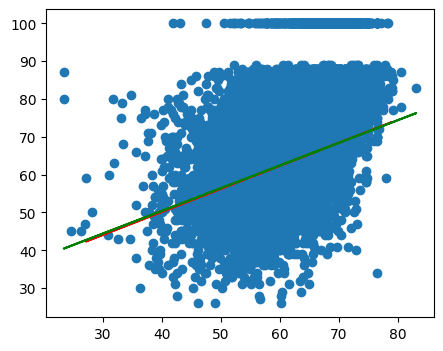

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], tabla_de_regresion['PUNT_INGLES'])
plt.plot(testx, pred_lineal, linestyle='-', color = "red")
plt.plot(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], pred_lineal01, linestyle='-', color = "green")
plt.show()

# Selección de variables explicativas a partir de los coeficientes de correlación de Pearson de Kendall y de Spearman

In [12]:
variables_explicativas = tabla_de_regresion.drop(columns=['ESTU_INSE_INDIVIDUAL']).columns
correlaciones = pd.DataFrame(index=variables_explicativas, columns=['Pearson', 'Kendall', 'Spearman'])

for variable in variables_explicativas:
    correlaciones.loc[variable, 'Pearson'] = tabla_de_regresion[variable].corr(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], method='pearson')
    correlaciones.loc[variable, 'Kendall'] = tabla_de_regresion[variable].corr(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], method='kendall')
    correlaciones.loc[variable, 'Spearman'] = tabla_de_regresion[variable].corr(tabla_de_regresion['ESTU_INSE_INDIVIDUAL'], method='spearman')

correlaciones = correlaciones.apply(pd.to_numeric)

umbral = 0.3

variables_seleccionadas = correlaciones[(correlaciones.abs() > umbral).any(axis=1)]

print("Variables seleccionadas basadas en el umbral de correlación:")
print(variables_seleccionadas)

Variables seleccionadas basadas en el umbral de correlación:
                           Pearson   Kendall  Spearman
PUNT_LECTURA_CRITICA      0.354778  0.246367  0.357586
PUNT_MATEMATICAS          0.376665  0.271050  0.393935
PUNT_C_NATURALES          0.359855  0.250519  0.364746
PUNT_SOCIALES_CIUDADANAS  0.357266  0.248843  0.362430
PUNT_INGLES               0.551155  0.395785  0.565737


A partir del analisis de los coeficientes de Pearson, Kendall y Spearman solo se puede concluir que aunque PUNT_INGLES no tenga un alto nivel de correlación está es la variable más explicativa

# Modelo de regresión lineal

In [14]:
X = tabla_de_regresion.drop('ESTU_INSE_INDIVIDUAL', axis = 1)
Y = tabla_de_regresion['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)


,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3113,58,66,65,61,75.0
7298,73,60,61,64,74.0
5894,71,76,62,59,78.0
7117,100,74,74,75,80.0


In [15]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)

r2_lineal = regresion.score(testX, testY)
r2_lineal

0.29596743300709427

In [16]:
X1 = tabla_de_regresion[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y1 = tabla_de_regresion['ESTU_INSE_INDIVIDUAL']
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
train1X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3113,58,66,65,61,75.0
7298,73,60,61,64,74.0
5894,71,76,62,59,78.0
7117,100,74,74,75,80.0


In [17]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal1 = regresion1.score(test1X, test1Y)
r2_lineal1

0.29596743300709427

Obtenemos un valor de correlación bajo de R^2 = 0.29596743300709427 pero realizando el procedimiento de ejercutar el codigo cada vez quitandole una variable para ver cúal es más explicativa vemos que PUNT_INGLES sigue siendo la variable más explicativa y de hecho la unica variable explicativa de la variable ESTU_INSE_INDIVIDUAL considerando al resto de variables PUNT_LECTURA_CRITICA, PUNT_MATEMATICAS, PUNT_C_NATURALES, PUNT_SOCIALES_CIUDADANAS como igual de poco explicativas para ESTU_INSE_INDIVIDUAL ya que tenemos que:

R2 = 0.2982987282607831 solo con PUNT_INGLES
R2 = 0.29596743300709427 con PUNT_INGLES, PUNT_LECTURA_CRITICA, PUNT_MATEMATICAS, PUNT_C_NATURALES, PUNT_SOCIALES_CIUDADANAS

# Modelo de red neuronal de perceptrón multicapa

In [18]:
from sklearn.neural_network import MLPRegressor

In [19]:

red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
max_iter = 500,
activation = 'relu',
solver = 'adam',
learning_rate = 'invscaling')

red.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [20]:
red.score(testX, testY)

0.29123388937567474

Con la implementación de esta red neuronal tenemos que el ajuste o el valor de R^2 = 0.19354538381826947 es muy bajo por lo que se recomendaría es uso de un modelo de regresión lineal el cúal logró mayor ajuste

In [23]:
no_obs = np.array([[68, 85, 71, 100, 82]])
print('Se espera que el estudiante tenga un indicador socioeconomico', red.predict(no_obs), 'bajo el perceptrón multicapa y ', regresion.predict(no_obs), 'bajo la regresión lineal')

Se espera que el estudiante tenga un indicador socioeconomico [69.2409803] bajo el perceptrón multicapa y  [66.76328434] bajo la regresión lineal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
